In [ ]:
pip install pandas seaborn matplotlib

In [2]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

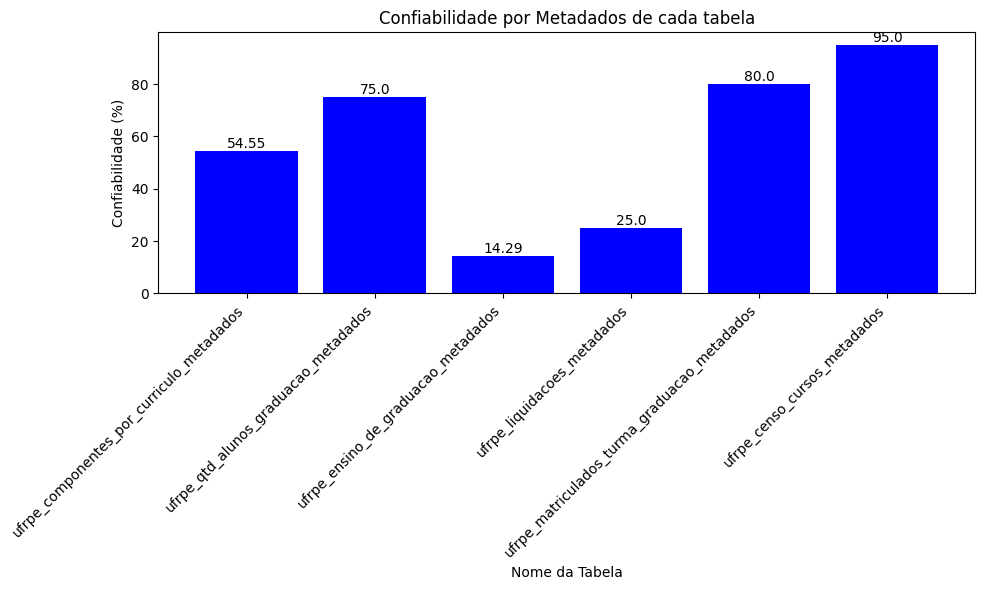

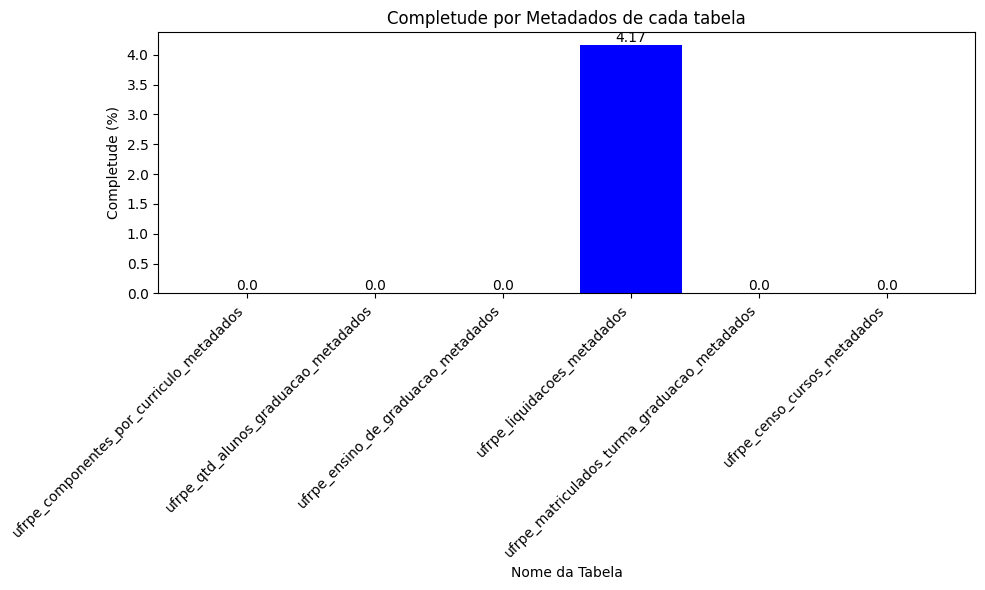

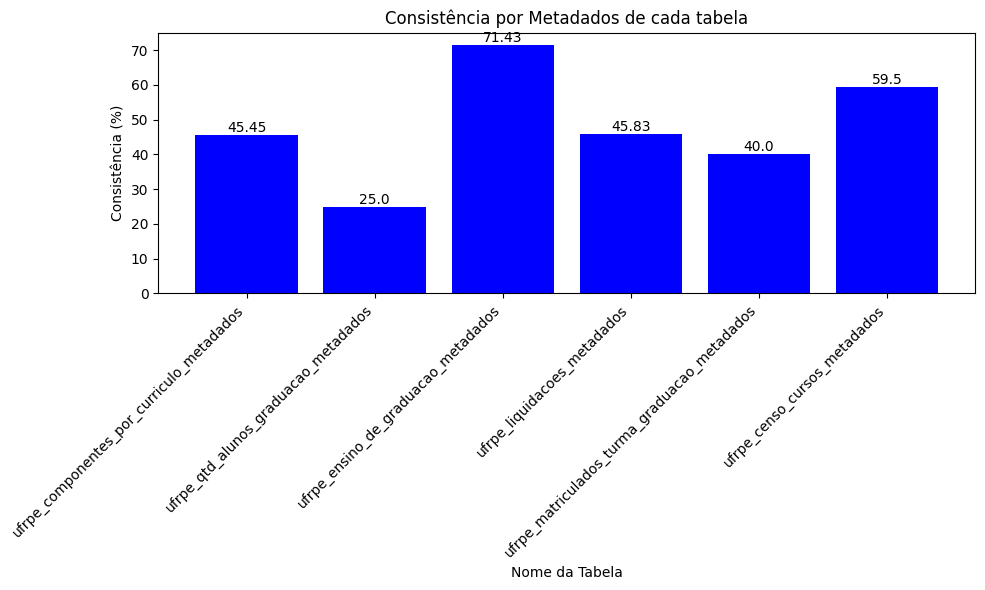

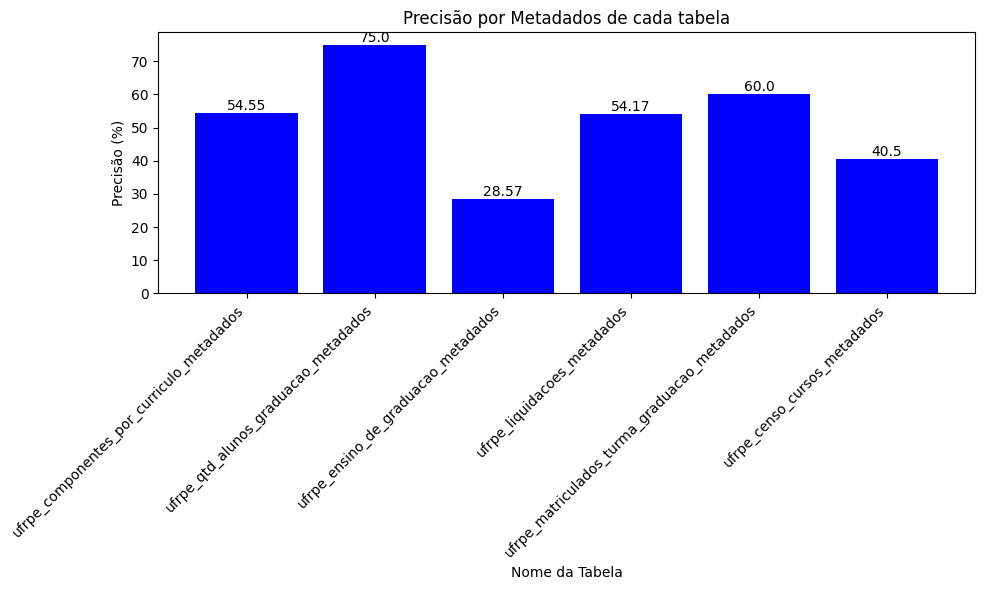

In [12]:
from collections import Counter
# Carregar os dados do CSV usando o pandas
dados = pd.read_csv('/home/juan/Documents/meta-qd/data/analysis/metricas_ufrpe.csv')

df = pd.DataFrame(dados)

# Converter os dados de float para porcentagem
df['confiabilidade'] *= 100
df['completude'] *= 100
df['consistencia'] *= 100
df['precisao'] *= 100

# Gráfico de barras para confiabilidade
plt.figure(figsize=(10, 6))
bars = plt.bar(df['nome_da_tabela'], df['confiabilidade'], color='blue')
plt.xlabel('Nome da Tabela')
plt.ylabel('Confiabilidade (%)')
plt.title('Confiabilidade por Metadados de cada tabela')
plt.xticks(rotation=45, ha='right')

# Adicionar valores exatos sobre as barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Gráfico de barras para Completude
plt.figure(figsize=(10, 6))
bars = plt.bar(df['nome_da_tabela'], df['completude'], color='blue')
plt.xlabel('Nome da Tabela')
plt.ylabel('Completude (%)')
plt.title('Completude por Metadados de cada tabela')
plt.xticks(rotation=45, ha='right')

# Adicionar valores exatos sobre as barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Gráfico de barras para confiabilidade
plt.figure(figsize=(10, 6))
bars = plt.bar(df['nome_da_tabela'], df['consistencia'], color='blue')
plt.xlabel('Nome da Tabela')
plt.ylabel('Consistência (%)')
plt.title('Consistência por Metadados de cada tabela')
plt.xticks(rotation=45, ha='right')

# Adicionar valores exatos sobre as barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Gráfico de barras para confiabilidade
plt.figure(figsize=(10, 6))
bars = plt.bar(df['nome_da_tabela'], df['precisao'], color='blue')
plt.xlabel('Nome da Tabela')
plt.ylabel('Precisão (%)')
plt.title('Precisão por Metadados de cada tabela')
plt.xticks(rotation=45, ha='right')

# Adicionar valores exatos sobre as barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

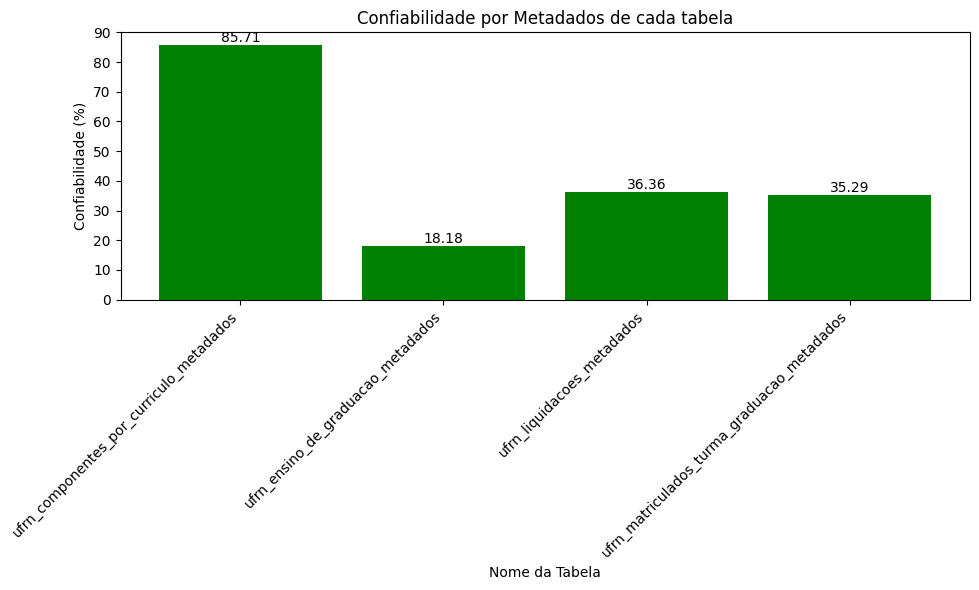

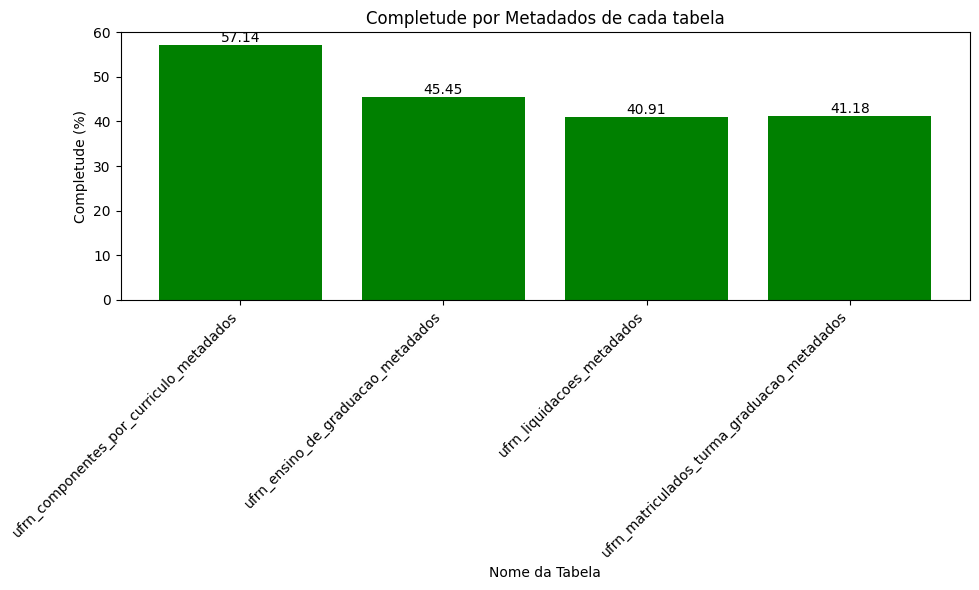

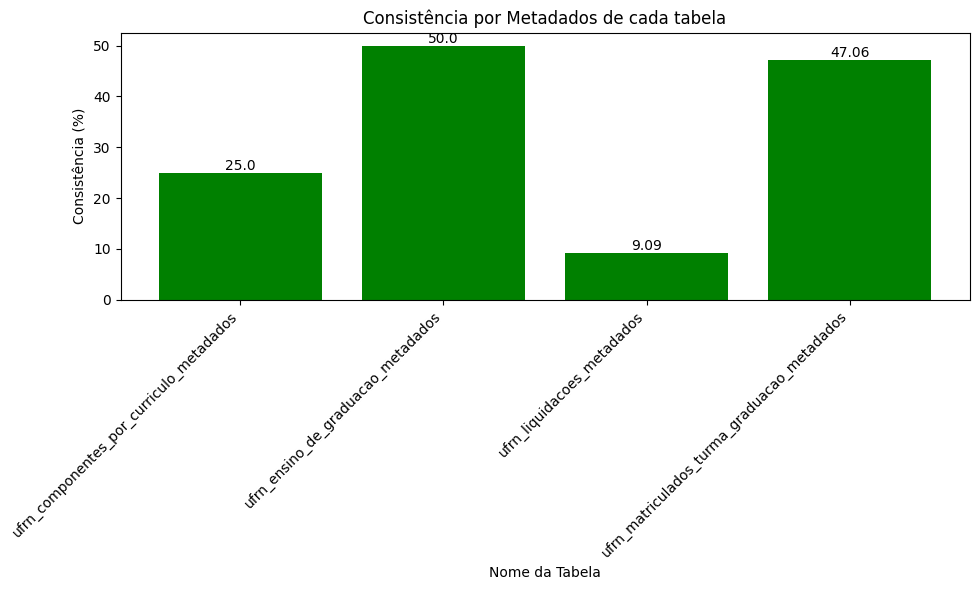

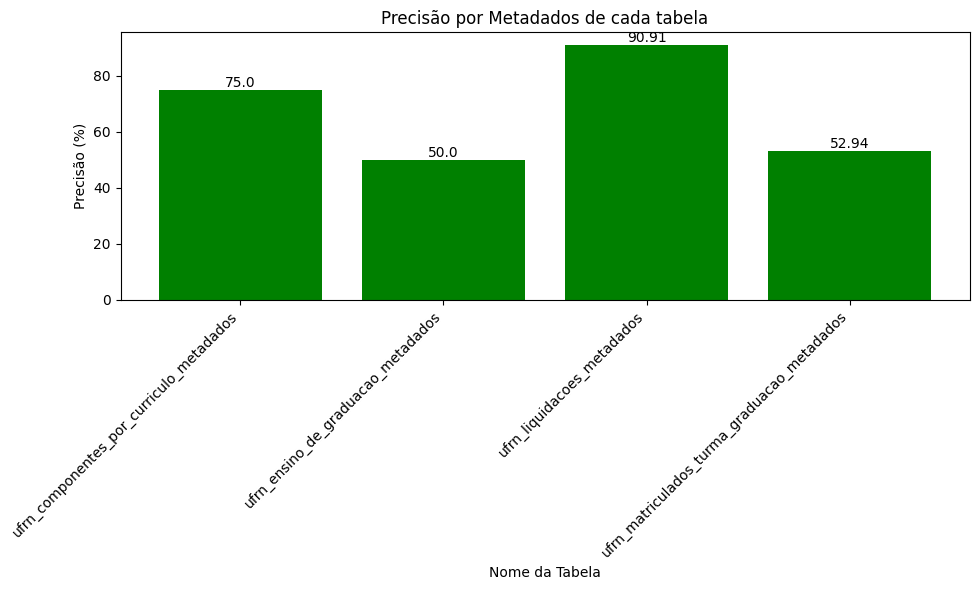

In [14]:
# Carregar os dados do CSV usando o pandas
dados = pd.read_csv('/home/juan/Documents/meta-qd/data/analysis/metricas_ufrn.csv')

df = pd.DataFrame(dados)

# Converter os dados de float para porcentagem
df['confiabilidade'] *= 100
df['completude'] *= 100
df['consistencia'] *= 100
df['precisao'] *= 100

# Gráfico de barras para confiabilidade
plt.figure(figsize=(10, 6))
bars = plt.bar(df['nome_da_tabela'], df['confiabilidade'], color='green')
plt.xlabel('Nome da Tabela')
plt.ylabel('Confiabilidade (%)')
plt.title('Confiabilidade por Metadados de cada tabela')
plt.xticks(rotation=45, ha='right')

# Adicionar valores exatos sobre as barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Gráfico de barras para Completude
plt.figure(figsize=(10, 6))
bars = plt.bar(df['nome_da_tabela'], df['completude'], color='green')
plt.xlabel('Nome da Tabela')
plt.ylabel('Completude (%)')
plt.title('Completude por Metadados de cada tabela')
plt.xticks(rotation=45, ha='right')

# Adicionar valores exatos sobre as barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Gráfico de barras para confiabilidade
plt.figure(figsize=(10, 6))
bars = plt.bar(df['nome_da_tabela'], df['consistencia'], color='green')
plt.xlabel('Nome da Tabela')
plt.ylabel('Consistência (%)')
plt.title('Consistência por Metadados de cada tabela')
plt.xticks(rotation=45, ha='right')

# Adicionar valores exatos sobre as barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Gráfico de barras para confiabilidade
plt.figure(figsize=(10, 6))
bars = plt.bar(df['nome_da_tabela'], df['precisao'], color='green')
plt.xlabel('Nome da Tabela')
plt.ylabel('Precisão (%)')
plt.title('Precisão por Metadados de cada tabela')
plt.xticks(rotation=45, ha='right')

# Adicionar valores exatos sobre as barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# TODO é interessante mudar a escala dos intervalos para dar uma ideia de realmente diferença, por exemplo 35.29 esta muito proximo visualmente de 36.36